In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline


from sklearn.cluster import DBSCAN
from collections import Counter
from scipy.spatial import distance

import sys
sys.path.append('../analysis/')
from csv_to_pandas import csv_into_dict_of_data
from constants import testing_dataset, training_dataset,validation_dataset
from plot_graph import remove_zero_columns

df_key = 'snmp'
epsilon = 10000
miniminum_points = 3
# print(testing_dataset, training_dataset,validation_dataset)

In [2]:
df_dict = csv_into_dict_of_data(training_dataset)
df_dict = remove_zero_columns(df_dict)
df_snmp_only = df_dict[df_key]

In [3]:
# testing_df_dict = csv_into_dict_of_data(testing_dataset)
# testing_df_dict = remove_zero_columns(testing_df_dict)
# testing_df =  testing_df_dict[df_key]

In [4]:
# df_comb = pd.concat([df_snmp_only, testing_df], axis=1)

df_comb = df_snmp_only

In [5]:
val_dict = csv_into_dict_of_data(validation_dataset)
val_dict = remove_zero_columns(val_dict)
val_df = val_dict[df_key]

val_df = val_df.reindex(sorted(val_df.columns), axis = 1)

In [6]:
df_timeIndex = df_comb.reindex(sorted(df_comb.columns), axis = 1)
numOfTrainingSample = len( df_comb.columns )

date = ['2018-10-08','2018-12-31',  # 2 mondays
        '2018-12-25','2019-01-01',  # closest points
        '2019-01-24','2019-01-25', '2019-01-26','2019-01-27'  # 2 cluster vs 2 outlier
         
        ]

df_dateIndex = df_timeIndex.T 
# df_timeIndex

## DBSCAN

In [7]:
model = DBSCAN(eps = epsilon, min_samples = miniminum_points).fit(df_dateIndex)
clusters = Counter(model.labels_)
clusters

Counter({0: 7, -1: 25, 1: 98, 2: 12})

## "Normal" Traffic

Text(0.5, 1.0, 'snmp traffic with epsilon 10000 and min points 3\ntotal data points: 142\nnumber of clusters: 3\ntotal outlier: 25 ( 17.61%) excluded')

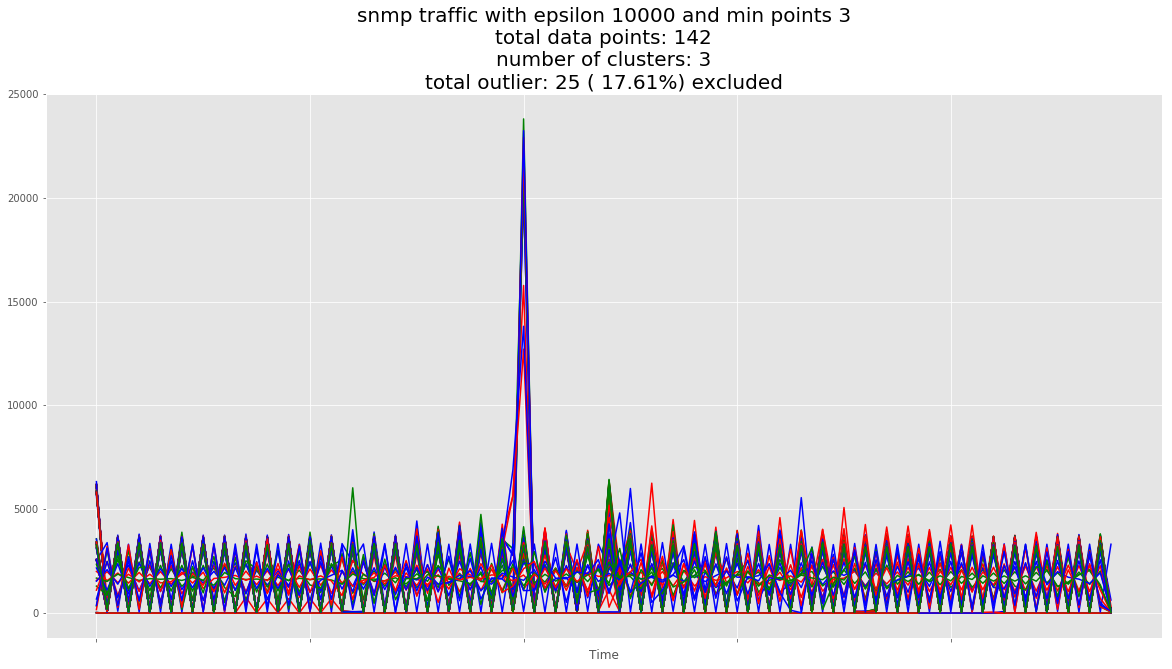

In [8]:
normal = df_dateIndex[model.labels_ != -1].T

normal.plot(legend = False, figsize = (20, 10), color = ['r', 'b', 'g'])
title = df_key +' traffic with epsilon ' + \
    str(epsilon) + ' and min points ' + str(miniminum_points) + '\n' + \
    'total data points: ' + str( numOfTrainingSample ) + '\n' + \
     'number of clusters: ' + str(len(clusters) - 1) + '\n' + \
    'total outlier: ' + str( clusters[-1] ) + \
    ' ( ' +  str( round(clusters[-1]  * 100.0 / numOfTrainingSample , 2)) + '%)' + ' excluded'

plt.title(title, fontsize=20)


## Cluster 0

Text(0.5, 1.0, 'First Cluster: Failing at data collection (7)')

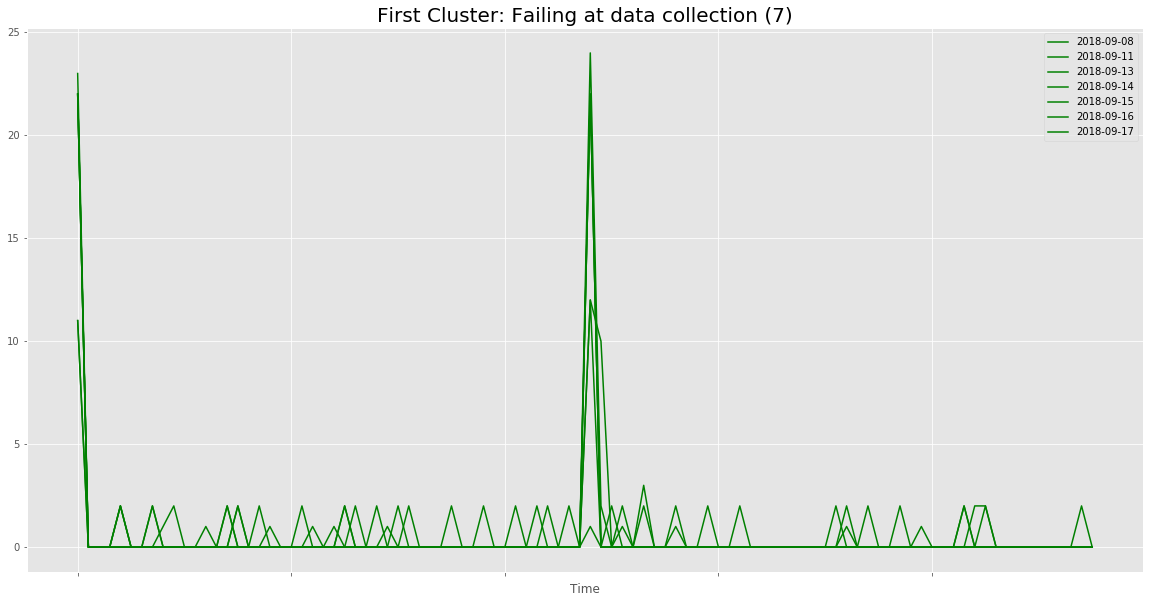

In [9]:
cluster0 = df_dateIndex[model.labels_ == 0].T

title0 = 'First Cluster: Failing at data collection (' + str(len(cluster0.columns)) + ')' 
cluster0.plot( figsize = (20,10), color = 'g')
plt.title(title0, fontsize=20)

## Cluster 1

Text(0.5, 1.0, 'Second Cluster: First 12 Mondays??')

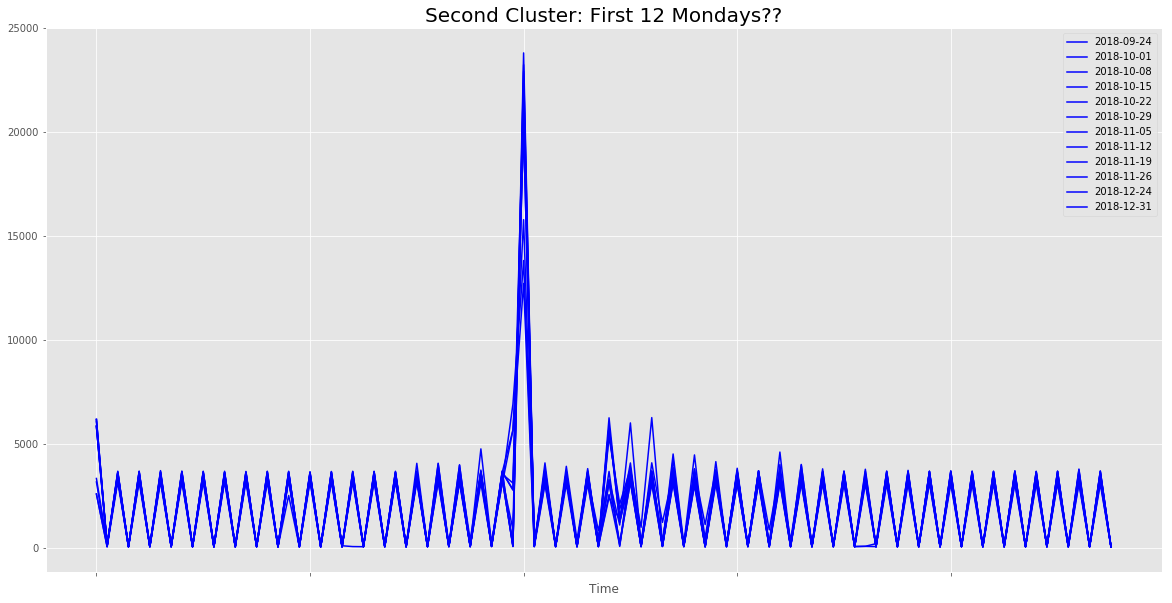

In [10]:
cluster2 = df_dateIndex[model.labels_ == 2].T
title2 = 'Second Cluster: First ' + str(len(cluster2.columns)) + ' Mondays??'

cluster2.plot(figsize = (20,10), color = 'b')
plt.title(title2, fontsize = 20)

## Cluster 3

Text(0.5, 1.0, 'Final Cluster: Majority (98 days / 69.01%) ')

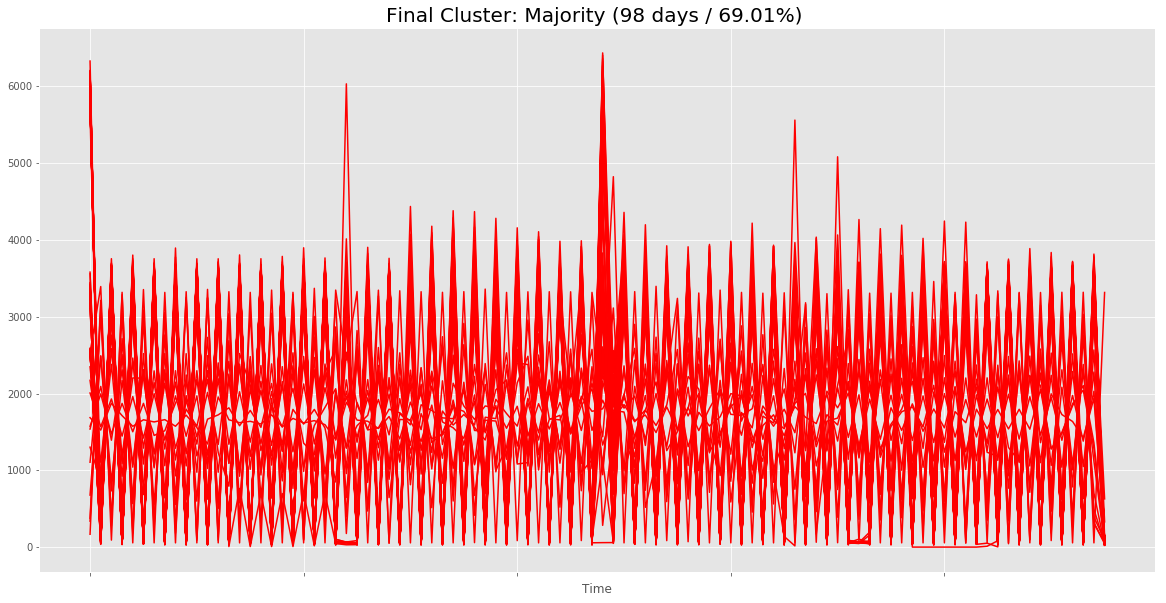

In [11]:
cluster1 = df_dateIndex[model.labels_ == 1].T
total = len(cluster1.columns)
title1 = 'Final Cluster: Majority (' + str(total) + ' days / ' +\
    str(round(total * 100.0 / numOfTrainingSample,2)) + '%) '

cluster1.plot(legend = False, figsize = (20,10), color = 'r')
plt.title(title1, fontsize = 20)


Text(0.5, 1.0, 'Jan 24th and 25th (Thursday and Friday) \n before outlier on 26th and 27th    \n Euclidean Distance between 2019-01-24 and 2019-01-24: \n6308.96')

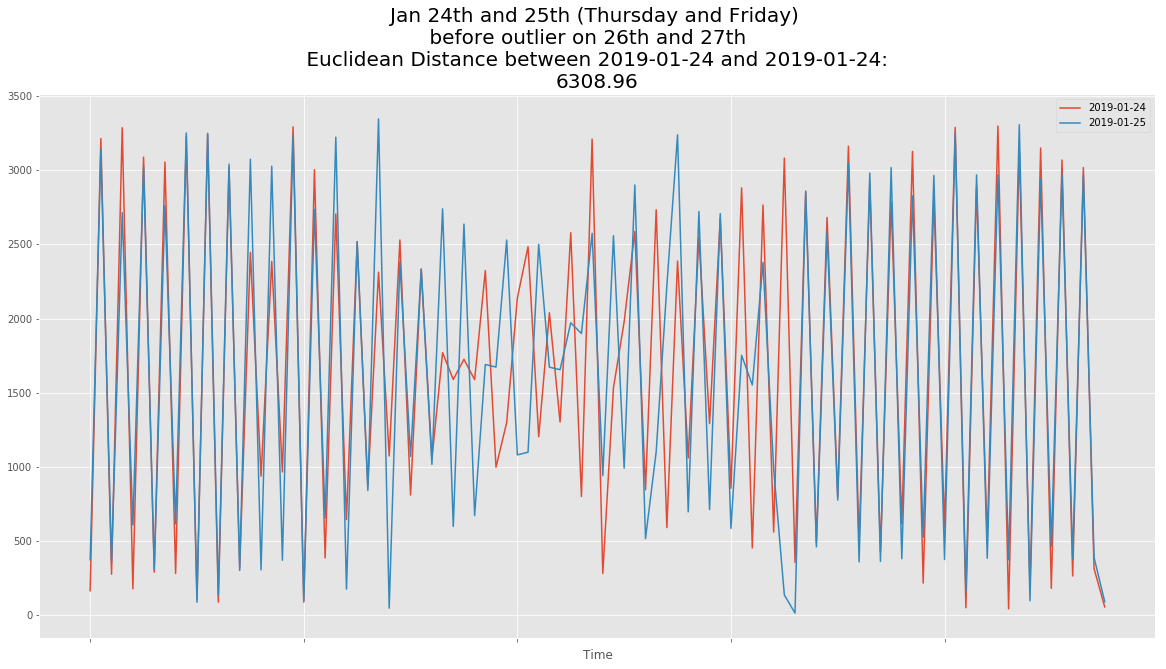

In [12]:
euclid = distance.euclidean(df_timeIndex[date[4]], df_timeIndex[date[5]])
title = 'Jan 24th and 25th (Thursday and Friday) \n before outlier on 26th and 27th\
    \n Euclidean Distance between ' + \
    date[4] + ' and '+ date[4] + ": \n"+ str(round(euclid,2))

df_timeIndex[[ date[4], date[5]]].plot(legend=True, figsize = (20, 10) )
plt.title(title, fontsize=20)

## Closest points

Text(0.5, 1.0, 'Christmas and New Year \n Euclidean Distance between 2018-12-25 and 2019-01-01: \n610.64')

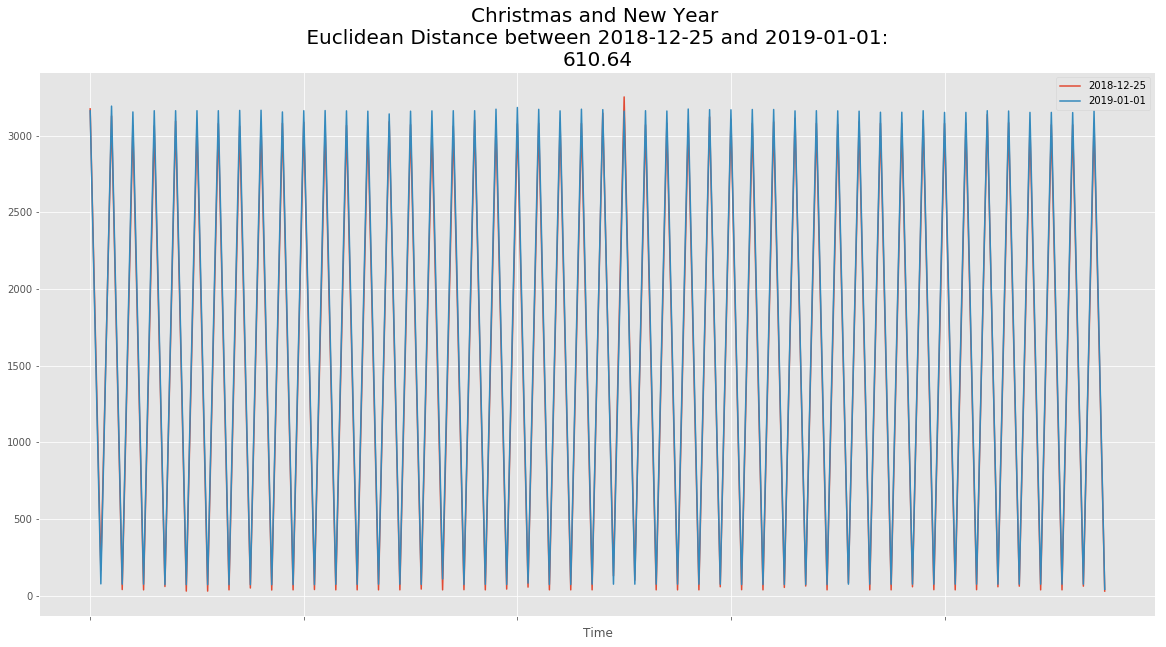

In [13]:
euclid = distance.euclidean(df_timeIndex[date[2]], df_timeIndex[date[3]])
title = 'Christmas and New Year \n Euclidean Distance between ' + \
    date[2] + ' and '+ date[3] + ": \n"+ str(round(euclid,2))

df_timeIndex[[ date[2], date[3]]].plot(legend=True, figsize = (20, 10) )
plt.title(title, fontsize=20)

# Outliers 

Text(0.5, 1.0, 'snmp traffic outlier (25 or 17.61%)')

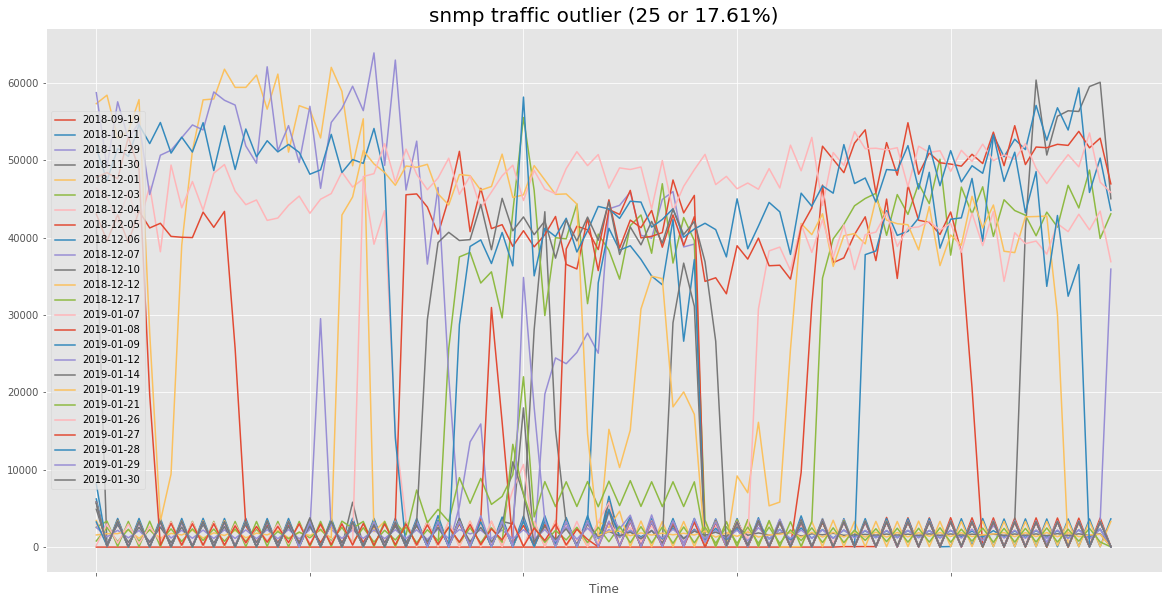

In [14]:
outlier = df_dateIndex[model.labels_ == -1].T

title_o = df_key + ' traffic outlier (' + str( len(outlier.columns ) ) +\
    ' or ' +  str( round(clusters[-1]  * 100.0 / numOfTrainingSample , 2)) + '%)'

outlier.plot(legend=True, figsize = (20, 10) )
plt.title(title_o, fontsize=20)

<h2><center>Outliers on Jan 26th and 27th compared to 24th and 25th!</center></h2>

Text(0.5, 1.0, 'Outliers on Jan 26th and 27th, compared to 2 previous days \n Euclidean Distance between 2019-01-24 (normal) \nand 2019-01-26(outlier) \n397562.83')

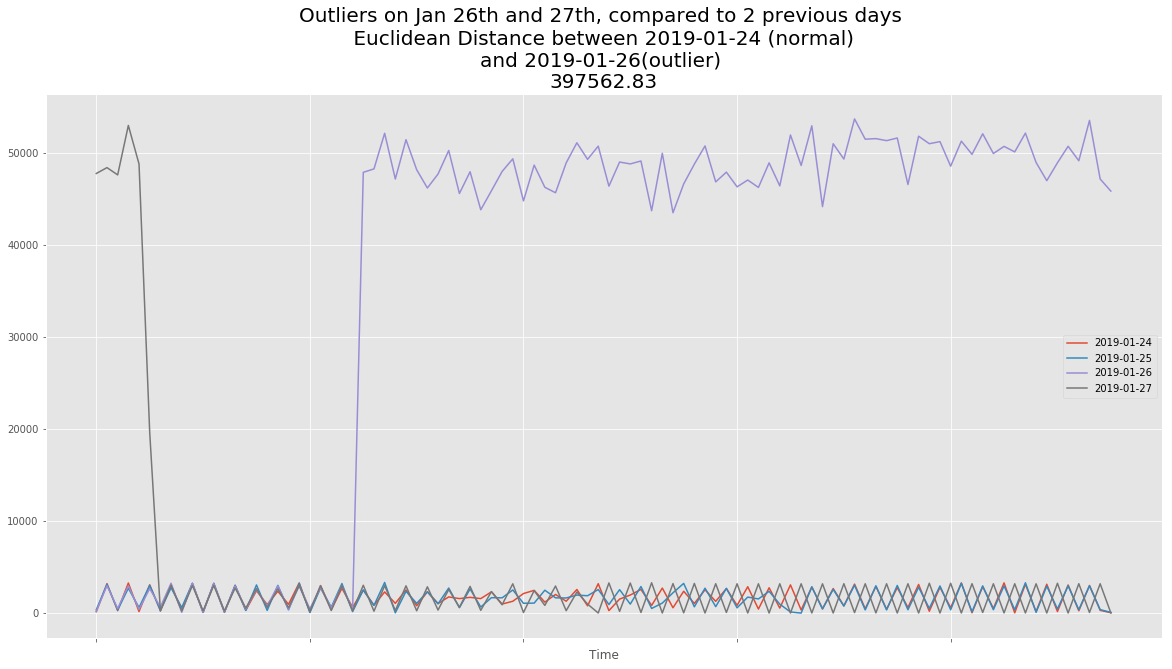

In [15]:
sample_df = df_timeIndex[[date[4],date[5],date[6],date[7] ]]

euclid = distance.euclidean(df_timeIndex[date[4]], df_timeIndex[date[6]])

title_s = 'Outliers on Jan 26th and 27th, compared to 2 previous days \n Euclidean Distance between ' + \
     date[4] + ' (normal) \nand ' +\
    date[6] + "(outlier) \n"+ str(round(euclid,2))

sample_df.plot(legend=True, figsize = (20, 10) )
plt.title(title_s, fontsize=20)


## 3000 per 15 minute vs 50000+
* easy outlier
* none of my IDS alerted me

## Outlier 2

Text(0.5, 1.0, 'Christmas and New Year \n Euclidean Distance between 2018-10-08 (normal) \nand 2018-12-10(outlier) \n61128.27')

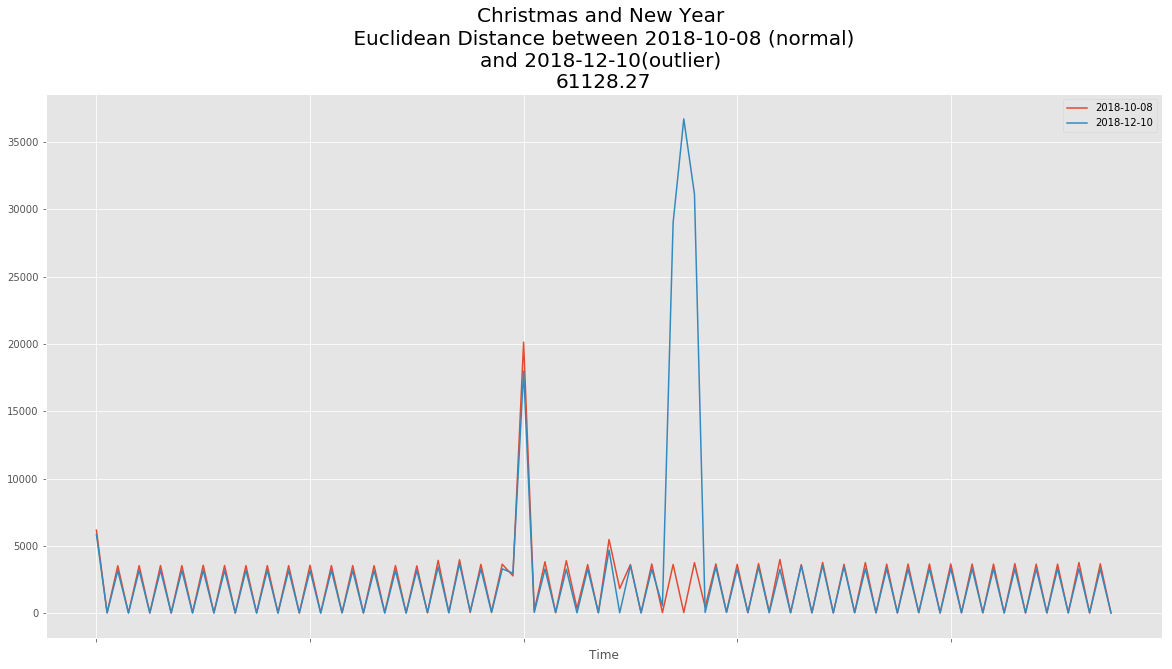

In [16]:
col = list(outlier.columns) ## 2018-10-11
date0 = date[0]
date1 = date[5]
date2 = '2018-12-10'

euclid = distance.euclidean(df_timeIndex[date1], df_timeIndex[date2])
title = 'Christmas and New Year \n Euclidean Distance between ' + \
     date0 + ' (normal) \nand ' +\
    date2 + "(outlier) \n"+ str(round(euclid,2))
                                                   
df_timeIndex[ [ date0,  date2 ]].plot(legend=True, figsize = (20, 10) )
plt.title(title, fontsize=20)
# print(col)

## Dimensionality Reduction
* High co-relation
* loss of feature to trace back
* more importantly: more work for me and employee

In [17]:
start = 23
stop = 27
hourX_timeIndex = df_timeIndex.iloc[start:stop ]
hourX_dateIndex = hourX_timeIndex.T
# hourX_timeIndex.plot(legend=False, figsize = (20, 10) )
startTime = hourX_dateIndex.columns[0][ :5]
stopTime = hourX_dateIndex.columns[-1][ :5]
# startTime

In [18]:
# hourX_dateIndex.columns

In [19]:
epsilon1 = 600
miniminum_points1 = 3
model1 = DBSCAN(eps = epsilon1, min_samples = miniminum_points1).fit(hourX_dateIndex)
# hourOne_df
clusters = Counter(model1.labels_)

clusters

Counter({0: 8, 1: 10, 2: 98, -1: 17, 3: 5, 4: 4})

Text(0.5, 1.0, 'outlier:17')

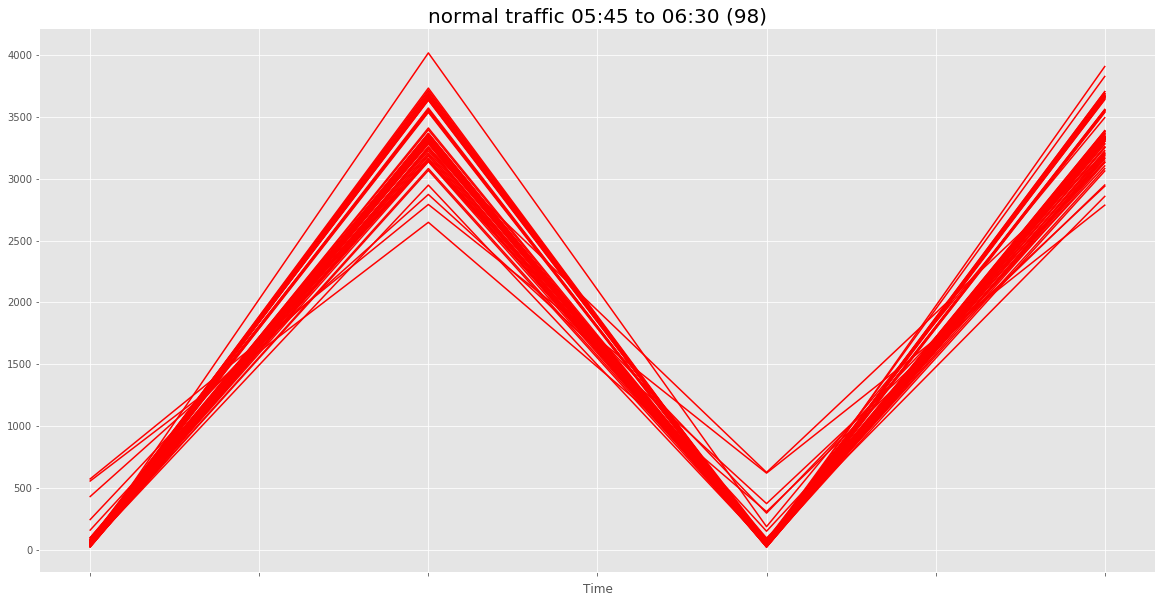

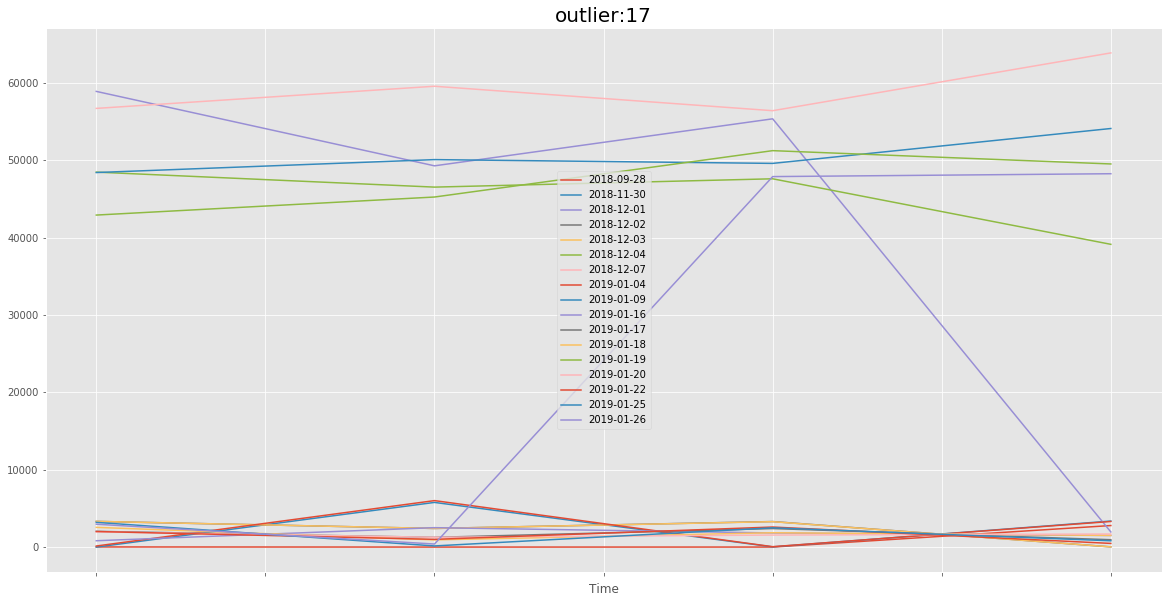

In [22]:
cluster0 = hourX_dateIndex[model1.labels_ == 0].T
cluster1 = hourX_dateIndex[model1.labels_ == 1].T
cluster2 = hourX_dateIndex[model1.labels_ == 2].T
# cluster3 = hourX_dateIndex[model1.labels_ == 3].T
# cluster4 = hourX_dateIndex[model1.labels_ == 4].T
# cluster5 = hourX_dateIndex[model1.labels_ == 5].T
# cluster6 = hourX_dateIndex[model1.labels_ == 6].T
# cluster6 = hourX_dateIndex[model1.labels_ == 6].T
clusterX = hourX_dateIndex[model1.labels_ == -1].T


title =  'normal traffic ' + startTime + ' to ' + stopTime +' (' + str(len(cluster2.columns)) + ')' 
cluster2.plot(legend=False, figsize = (20,10), color = 'r')
plt.title(title, fontsize=20)

title0 = 'outlier:' + str(len(clusterX.columns))
clusterX.plot(legend=True, figsize = (20,10) )
plt.title(title0, fontsize=20)



Text(0.5, 1.0, '05:45 to 06:30')

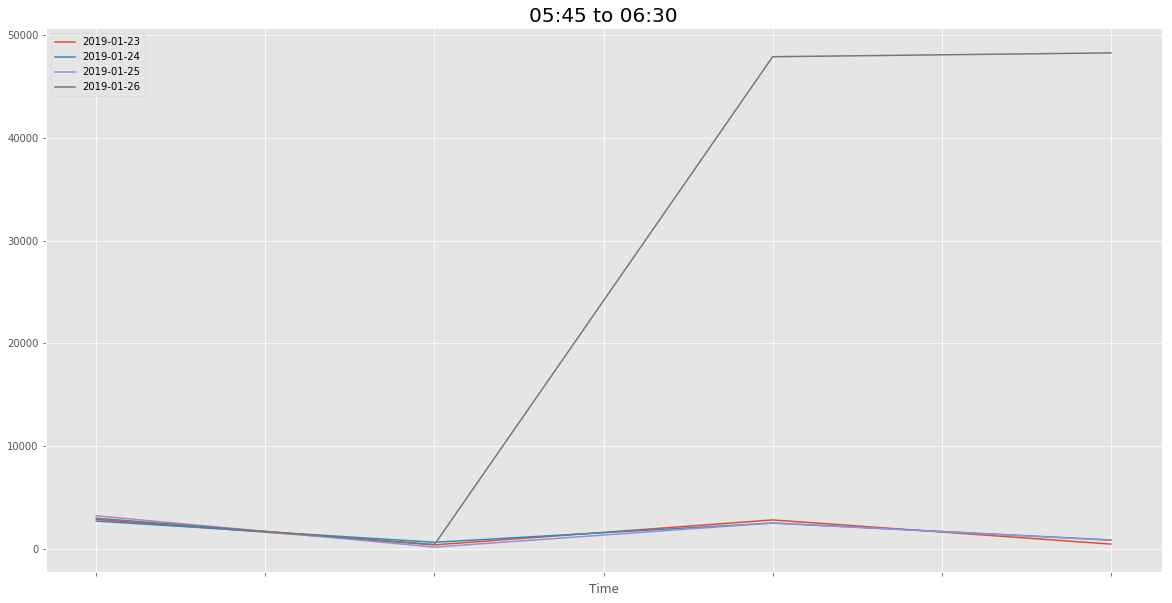

In [24]:
hourX_timeIndex[ ['2019-01-23','2019-01-24','2019-01-25','2019-01-26' ] ].plot(figsize = (20,10) )

title =  startTime + ' to ' + stopTime 
plt.title(title, fontsize=20)